In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv("train.csv")

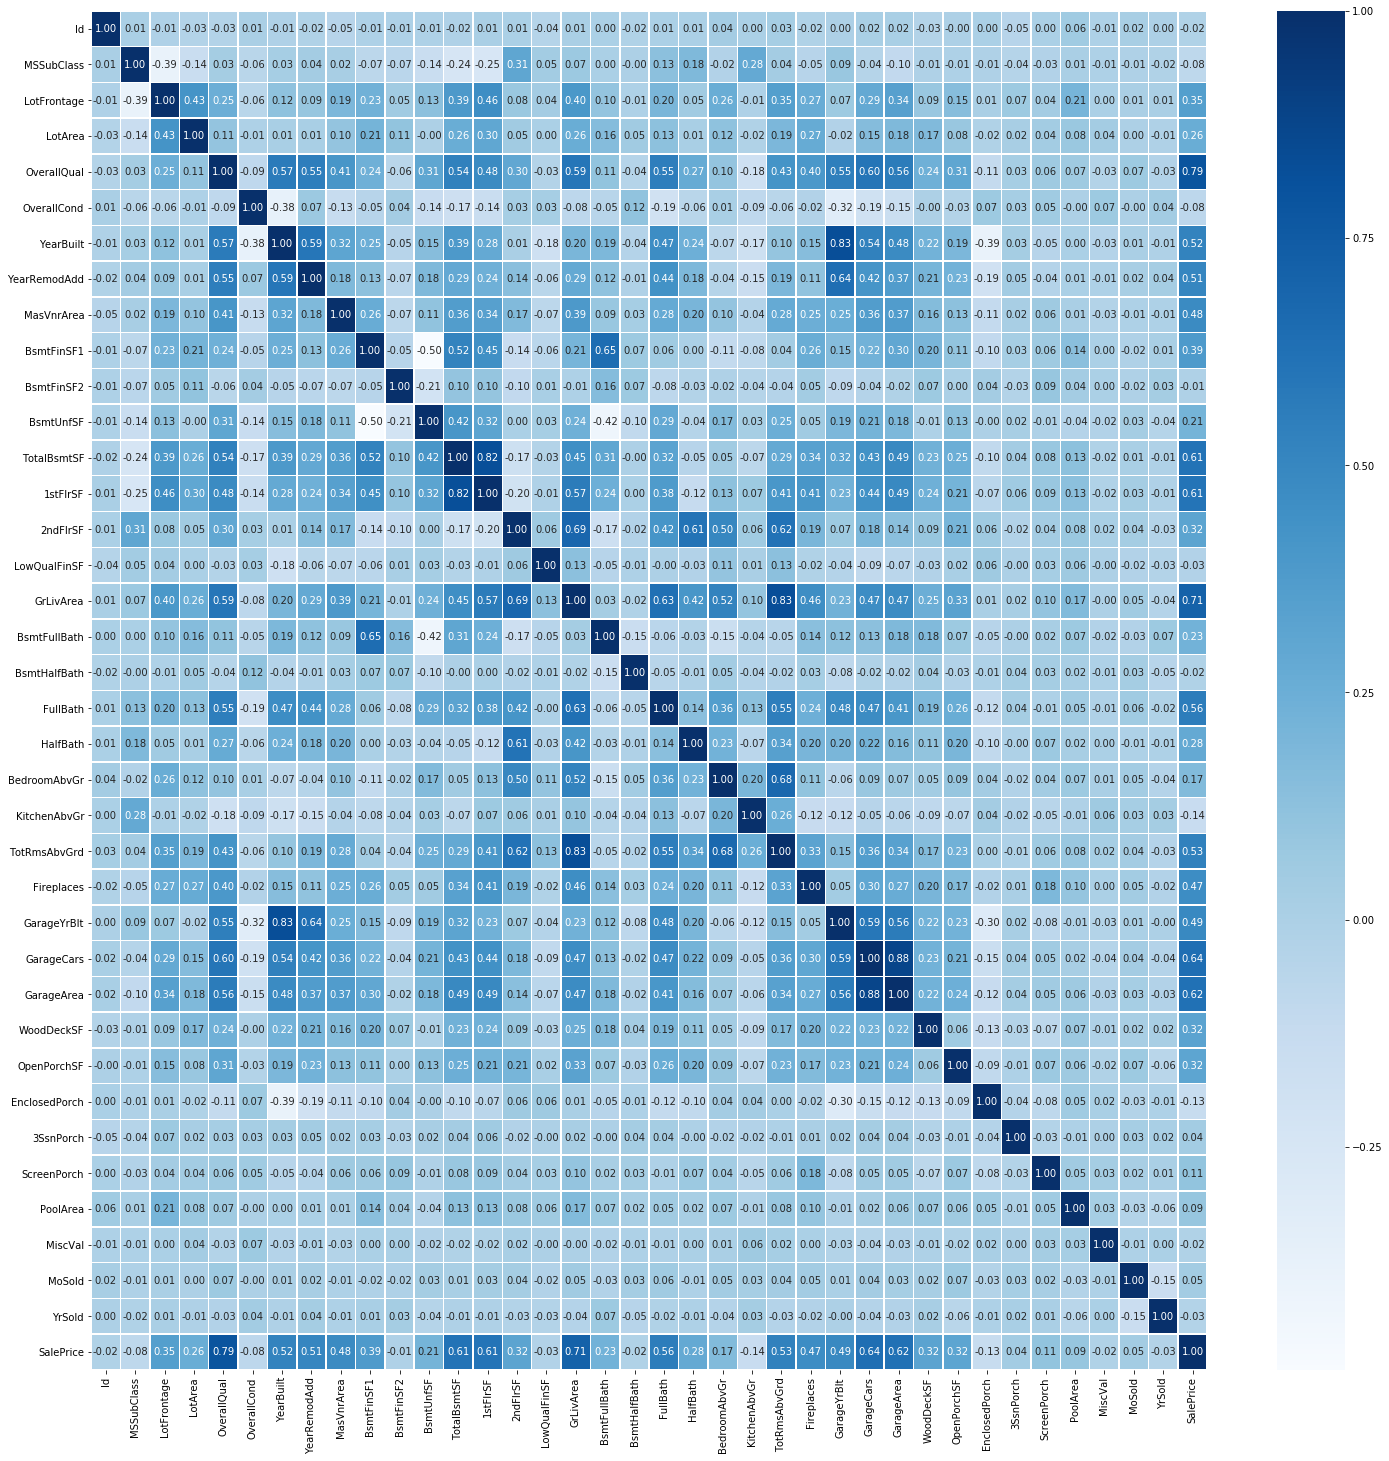

In [4]:
plt.figure(figsize=(25,25))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [4]:
df.shape

(1460, 81)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [42]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [43]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / df.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
3,LotFrontage,259,0.177397
6,Alley,1369,0.937671
25,MasVnrType,8,0.005479
26,MasVnrArea,8,0.005479
30,BsmtQual,37,0.025342
31,BsmtCond,37,0.025342
32,BsmtExposure,38,0.026027
33,BsmtFinType1,37,0.025342
35,BsmtFinType2,38,0.026027
42,Electrical,1,0.000685


----

In [19]:
data1=df.iloc[:,1:7]
data1['SalePrice']=df['SalePrice']

In [20]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,SalePrice
0,60,RL,65.0,8450,Pave,NaN,208500
1,20,RL,80.0,9600,Pave,NaN,181500
2,60,RL,68.0,11250,Pave,NaN,223500
3,70,RL,60.0,9550,Pave,NaN,140000
4,60,RL,84.0,14260,Pave,NaN,250000


In [56]:
data1.corr()

,MSSubClass,LotFrontage,LotArea,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.351799
LotArea,-0.139781,0.426095,1.000000,0.263843
SalePrice,-0.084284,0.351799,0.263843,1.000000


In [57]:
data2=df.iloc[:,7:12]
data2['SalePrice']=df['SalePrice']

In [58]:
data2.head()

,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
0,Reg,Lvl,AllPub,Inside,Gtl,208500
1,Reg,Lvl,AllPub,FR2,Gtl,181500
2,IR1,Lvl,AllPub,Inside,Gtl,223500
3,IR1,Lvl,AllPub,Corner,Gtl,140000
4,IR1,Lvl,AllPub,FR2,Gtl,250000


In [60]:
data2.corr()

,SalePrice
SalePrice,1.0


In [29]:
data3=df.iloc[:,12:21]
data3['SalePrice']=df['SalePrice']

In [30]:
data3.head()

,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,208500
1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,181500
2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,223500
3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,140000
4,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,250000


In [61]:
data3.corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.790982
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.077856
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.522897
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.507101
SalePrice,0.790982,-0.077856,0.522897,0.507101,1.000000


In [31]:
data4=df.iloc[:,21:30]
data4['SalePrice']=df['SalePrice']

In [32]:
data4.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,SalePrice
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,208500
1,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,181500
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,223500
3,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,140000
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,250000


In [62]:
data4.corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.477493
SalePrice,0.477493,1.000000


In [33]:
data5=df.iloc[:,30:39]
data5['SalePrice']=df['SalePrice']

In [34]:
data5.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,Gd,TA,No,GLQ,706,Unf,0,150,856,208500
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,181500
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,223500
3,TA,Gd,No,ALQ,216,Unf,0,540,756,140000
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,250000


In [67]:
data5.corr()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
BsmtFinSF1,1.000000,-0.050117,-0.495251,0.522396,0.386420
BsmtFinSF2,-0.050117,1.000000,-0.209294,0.104810,-0.011378
BsmtUnfSF,-0.495251,-0.209294,1.000000,0.415360,0.214479
TotalBsmtSF,0.522396,0.104810,0.415360,1.000000,0.613581
SalePrice,0.386420,-0.011378,0.214479,0.613581,1.000000


In [35]:
data6=df.iloc[:,39:47]
data6['SalePrice']=df['SalePrice']
data6.head()

,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
0,GasA,Ex,Y,SBrkr,856,854,0,1710,208500
1,GasA,Ex,Y,SBrkr,1262,0,0,1262,181500
2,GasA,Ex,Y,SBrkr,920,866,0,1786,223500
3,GasA,Gd,Y,SBrkr,961,756,0,1717,140000
4,GasA,Ex,Y,SBrkr,1145,1053,0,2198,250000


In [68]:
data6.corr()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
1stFlrSF,1.000000,-0.202646,-0.014241,0.566024,0.605852
2ndFlrSF,-0.202646,1.000000,0.063353,0.687501,0.319334
LowQualFinSF,-0.014241,0.063353,1.000000,0.134683,-0.025606
GrLivArea,0.566024,0.687501,0.134683,1.000000,0.708624
SalePrice,0.605852,0.319334,-0.025606,0.708624,1.000000


In [37]:
data7=df.iloc[:,47:58]
data7['SalePrice']=df['SalePrice']
data7.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,SalePrice
0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,208500
1,0,1,2,0,3,1,TA,6,Typ,1,TA,181500
2,1,0,2,1,3,1,Gd,6,Typ,1,TA,223500
3,1,0,1,0,3,1,Gd,7,Typ,1,Gd,140000
4,1,0,2,1,4,1,Gd,9,Typ,1,TA,250000


In [69]:
data7.corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,SalePrice
BsmtFullBath,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.227122
BsmtHalfBath,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.016844
FullBath,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.560664
HalfBath,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.284108
BedroomAbvGr,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.168213
KitchenAbvGr,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.135907
TotRmsAbvGrd,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.533723
Fireplaces,0.137928,0.028976,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.466929
SalePrice,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,1.000000


In [39]:
data8=df.iloc[:,58:66]
data8['SalePrice']=df['SalePrice']
data8.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SalePrice
0,Attchd,2003.0,RFn,2,548,TA,TA,Y,208500
1,Attchd,1976.0,RFn,2,460,TA,TA,Y,181500
2,Attchd,2001.0,RFn,2,608,TA,TA,Y,223500
3,Detchd,1998.0,Unf,3,642,TA,TA,Y,140000
4,Attchd,2000.0,RFn,3,836,TA,TA,Y,250000


In [70]:
data8.corr()

,GarageYrBlt,GarageCars,GarageArea,SalePrice
GarageYrBlt,1.000000,0.588920,0.564567,0.486362
GarageCars,0.588920,1.000000,0.882475,0.640409
GarageArea,0.564567,0.882475,1.000000,0.623431
SalePrice,0.486362,0.640409,0.623431,1.000000


In [40]:
data9=df.iloc[:,66:76]
data9['SalePrice']=df['SalePrice']
data9.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,250000


In [71]:
data9.corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.021190
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,1.000000


In [41]:
data10=df.iloc[:,76:81]
data10.head()

,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,2008,WD,Normal,208500
1,5,2007,WD,Normal,181500
2,9,2008,WD,Normal,223500
3,2,2006,WD,Abnorml,140000
4,12,2008,WD,Normal,250000


In [72]:
data10.corr()

,MoSold,YrSold,SalePrice
MoSold,1.000000,-0.145721,0.046432
YrSold,-0.145721,1.000000,-0.028923
SalePrice,0.046432,-0.028923,1.000000


---

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df[df['SalePrice']>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


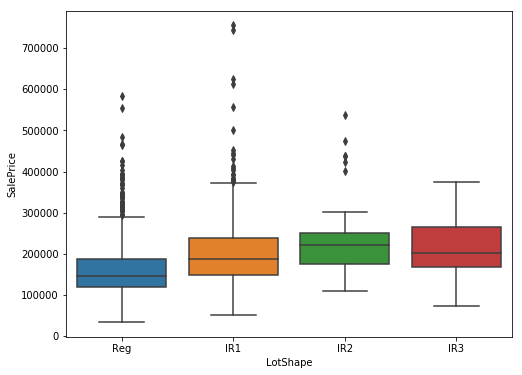

In [26]:
data = pd.concat([df['SalePrice'],df['LotShape']],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='LotShape', y='SalePrice',data=data)
                  

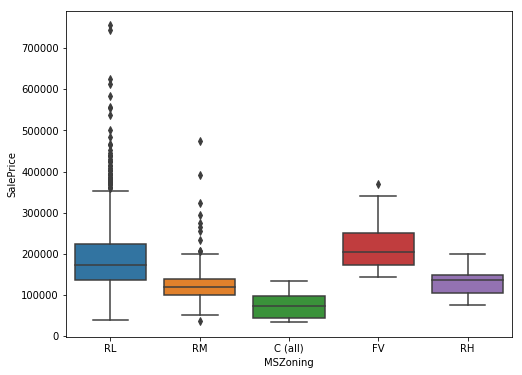

In [21]:
data = pd.concat([df['SalePrice'],df['MSZoning']],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='MSZoning', y='SalePrice',data=data)
                  